# Indicador de Desempeño de Estudiantes

## Ciclo de vida proyecto ML

- Entender la definición del problema
- Recolectar datos
- Chequeo de datos para desarrollar
- EDA
- Pre-procesamiento de datos
- Entrenamiento del modelo
- Elección del mejor modelo

### (1) Definición del problema

- Este proyecto entiendo como el desempeño de los estudiantes (tests scores) es afectado por otras variables tales como lo son el genero,etnicidad, nivel educativo de los parientes, almuerzo y curso de preparación para la prueba. 

### (2) Recolección de datos

- Fuente de datos: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- Los datos consisten de 1000 filas (registros) y 8 columnas (variables).

#### (2.1) Importar dartos y paquetes requeridos

In [2]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

##### Importar datos como un dataframe

In [6]:
df = pd.read_csv('data/stud.txt')

##### Mostrar los 5 primeros registros

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Dimensión del dataset

In [8]:
df.shape

(1000, 8)

#### (2.2) Información del dataset

- gender: Sexo del estudiante -> (Male/Female)
- race/ethnicity: Etnicidad del estudiante -> (Group A,B,C,D,E)
- parental level of education: Educación más alta de los padres -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- luch: Tuvo almuerzo antes de la prueba -> (Standard or free/reduced)
- test preparation course: Completo o incompleto antes de la prueba
- math score: Puntaje en matematicas
- reading score: Puntaje en lectura
- writing score: Puntaje en escritura

### (3) Chequeo de datos a desarrollar

- Comprobar valores faltantes
- Comprobar duplicados
- Comprobar tipos de datos
- Comprobar el numero de valores unicos en cada columna
- Comprobar estadisticas de dataset
- Comprobar varias categorias presentes dentro de las columnas categoricas


#### (3.1) Comprobar valores faltantes

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No existen valores faltantes dentro del conjunto de datos

#### (3.2) Comprobar duplicados

In [10]:
df.duplicated().sum()

0

No existen valores duplicados dentro del conjunto de datos

#### (3.3) Comprobar tipos de datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### (3.4)  Comprobar el numero de valores unicos en cada columna

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### (3.5)  Comprobar estadisticas de dataset

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Conocimiento

De las estadisticas de las variables numericas:

- Todas las medias estan cerca de si mismas - entre 66 y 68.05
- Todas las desviaciones estandar estan tambien cerca - entre 14.6 y 15.19
- Mientras que el minimo en matematicas es 0, en lectura es 17 y en escritura es 10

#### (3.6)  Explorando los datos

In [17]:
print('Categorias en la variable "gender"   ', end=" ")
print(df['gender'].unique())

print('Categorias en la variable "race_ethnicity"   ', end=" ")
print(df['race_ethnicity'].unique())

print('Categorias en la variable "parental_level_of_education"   ', end=" ")
print(df['parental_level_of_education'].unique())

print('Categorias en la variable "lunch"   ', end=" ")
print(df['lunch'].unique())

print('Categorias en la variable "test_preparation_course"   ', end=" ")
print(df['test_preparation_course'].unique())

Categorias en la variable "gender"    ['female' 'male']
Categorias en la variable "race_ethnicity"    ['group B' 'group C' 'group A' 'group D' 'group E']
Categorias en la variable "parental_level_of_education"    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorias en la variable "lunch"    ['standard' 'free/reduced']
Categorias en la variable "test_preparation_course"    ['none' 'completed']


In [19]:
# Definir variables cateforicas y numericas
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# Mostrar columnas
print('Se tienen {} variables numericas: {}'.format(len(numerical_features), numerical_features))
print('Se tienen {} variables categoricas: {}'.format(len(categorical_features), categorical_features))

Se tienen 3 variables numericas: ['math_score', 'reading_score', 'writing_score']
Se tienen 5 variables categoricas: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### (3.7) Añadiendo columnas para "Total Score" y "Average"

In [22]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average'] = df['total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [24]:
# ¿Cuantos tienen un puntaje perfecto en cada clase (math, reading, writing)?
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Numero de estudiantes con puntaje perfecto en lectura: {reading_full}')
print(f'Numero de estudiantes con puntaje perfecto en escritura: {writing_full}')
print(f'Numero de estudiantes con puntaje perfecto en matematicas: {math_full}')

Numero de estudiantes con puntaje perfecto en lectura: 17
Numero de estudiantes con puntaje perfecto en escritura: 14
Numero de estudiantes con puntaje perfecto en matematicas: 7


In [25]:
# ¿Cuantos tienen un puntaje menor o igual a 20 en cada clase (math, reading, writing)?
reading_q20 = df[df['reading_score'] <= 20]['average'].count()
writing_q20 = df[df['writing_score'] <= 20]['average'].count()
math_q20 = df[df['math_score'] <= 20]['average'].count()

print(f'Numero de estudiantes con puntaje menor a 20 en lectura: {reading_q20}')
print(f'Numero de estudiantes con puntaje menor a 20 en escritura: {writing_q20}')
print(f'Numero de estudiantes con puntaje menor a 20 en  matematicas: {math_q20}')

Numero de estudiantes con puntaje menor a 20 en lectura: 1
Numero de estudiantes con puntaje menor a 20 en escritura: 3
Numero de estudiantes con puntaje menor a 20 en  matematicas: 4


##### Conocimiento

- De los valores obtenidos anteriormente se tiene que los estudiantes se desempeñaron peor en matematica
- El mejor desempeño de los estudiantes esta en lectura

### (4) Explorando los datos (Visualmente)

#### (4.1) Visualizar el promedio de la distribución de puntajes y realizar una conclusión

- Histograma
- Funcion de distribución kernel (KDE)

<Axes: xlabel='average', ylabel='Count'>

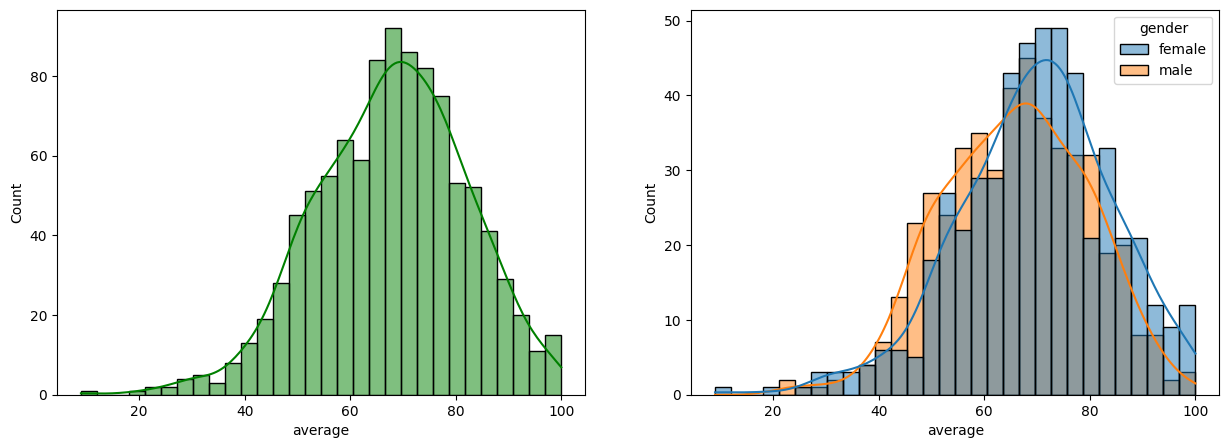

In [27]:
fig , ax = plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

##### Conocimiento

- Las mujeres tienden a obtener un puntaje promedio mayor que los hombres

<Axes: xlabel='average', ylabel='Count'>

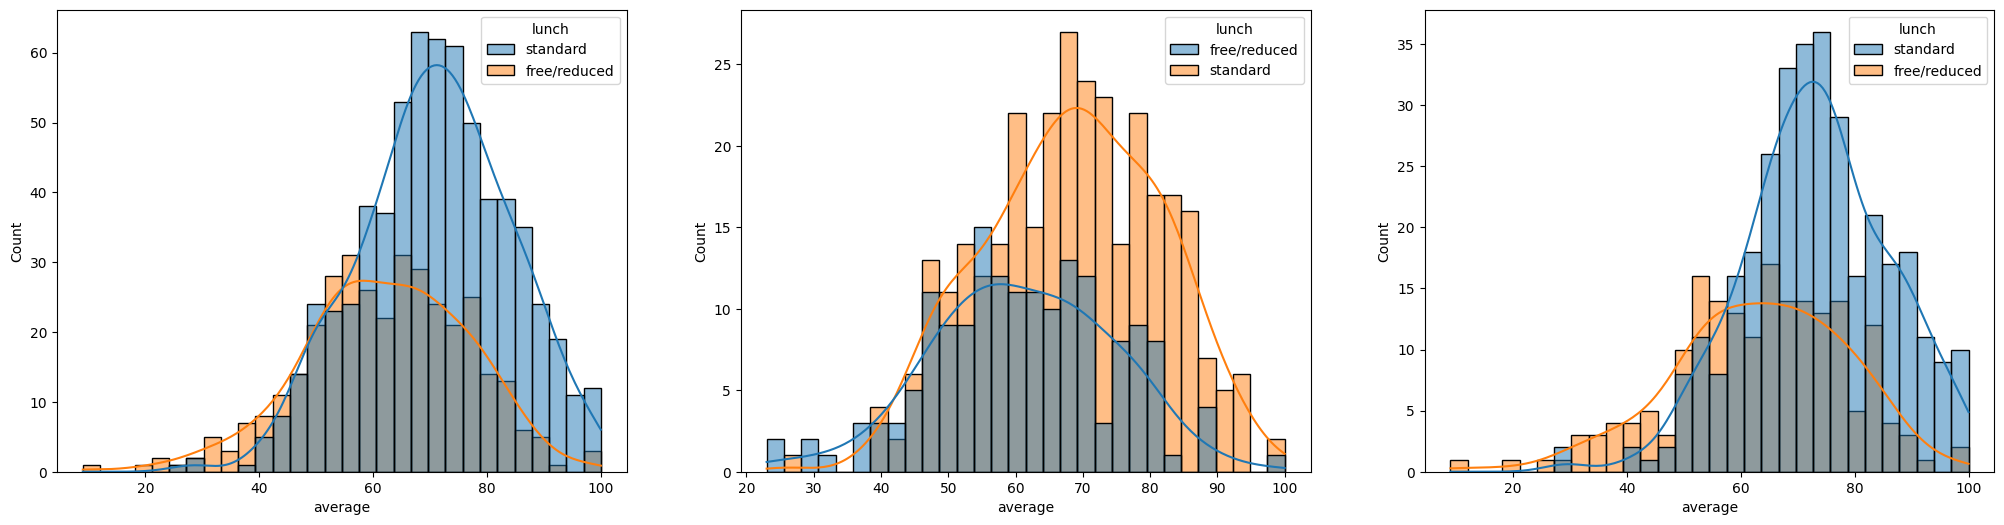

In [32]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average', bins=30, kde=True, hue='lunch')

#### Conocimiento

- Standard ayuda a desempeñarse mejor en el examen
- Standard ayuda a desempeñarse mejor independiente si se es hombre o mujer